In [1]:
import sys
sys.path.append("../")
# import ../db.py
from utils import *
from merge_utils import *
from align_utils import *

In [2]:
rIm=read_raw("../static_videos/lowlight3_frame47_tremor_rg10_2.raw", 
             frame = 10, rows=1087*2, runL=3968)

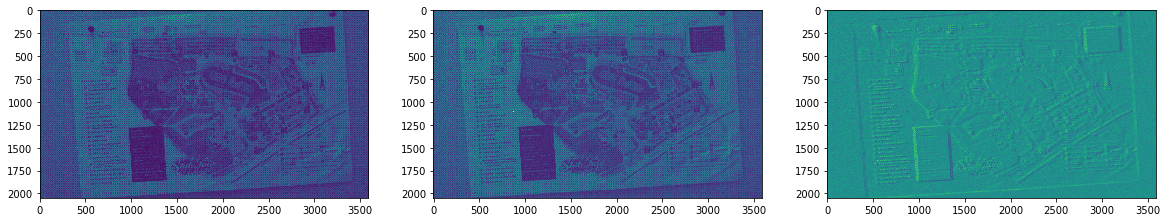

In [3]:
ref, alt = rIm[0][:2048, :3584], rIm[9][30:30+2048, 40:40+3584]
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)  # frame 0
ax[1].imshow(alt) # frame 1
ax[2].imshow(ref - alt)
plt.show()

total error: 12350102


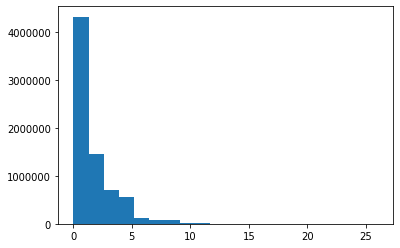

In [4]:
print("total error:", np.sum(np.abs(ref - alt)))
plt.hist(np.abs(ref - alt).flatten(), 20)
plt.show()

(127, 223, 2)


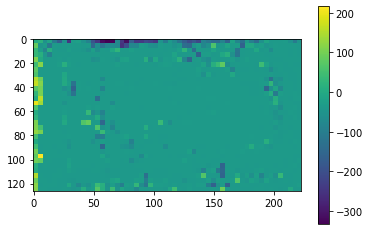

In [5]:
final_align_field = np.load('final_align_field.npy')
upsampled_align_field = upsample_align_field(final_align_field)
bi_align_field = bilateral_upsample(upsampled_align_field)
print(bi_align_field.shape)
plt.imshow(bi_align_field[..., 1])
plt.colorbar()
plt.show()

In [6]:
alignedImg = align_final(alt, upsampled_align_field)

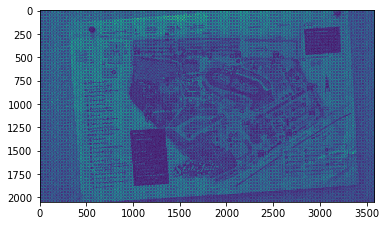

In [7]:
plt.imshow(alignedImg)
plt.show()

In [8]:
merged_frame = merge(ref, alt, bi_align_field)

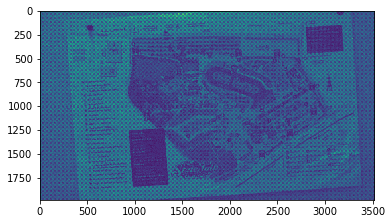

In [9]:
plt.imshow(merged_frame[32:-32, 32:-32])
plt.show()

In [10]:
window = raised_cosine_filter()

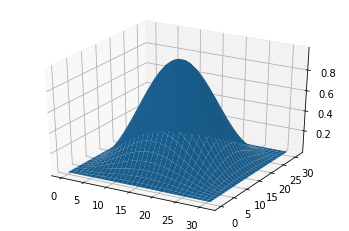

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(32)
xv, yv = np.meshgrid(x, x)
ax.plot_surface(X = xv, Y  = yv, Z = window)
plt.show()

## comparison

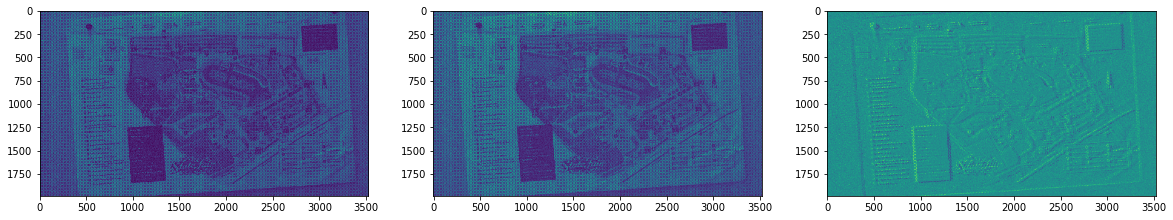

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref[32:-32, 32:-32])  # frame 0
ax[1].imshow(alt[32:-32, 32:-32]) # frame 1
ax[2].imshow(ref[32:-32, 32:-32] - alt[32:-32, 32:-32])
plt.show()

total error: 11912142


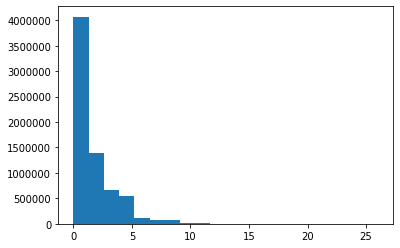

In [13]:
print("total error:", np.sum(np.abs(ref[32:-32, 32:-32] - alt[32:-32, 32:-32])))
plt.hist(np.abs(ref[32:-32, 32:-32] - alt[32:-32, 32:-32]).flatten(), 20)
plt.show()

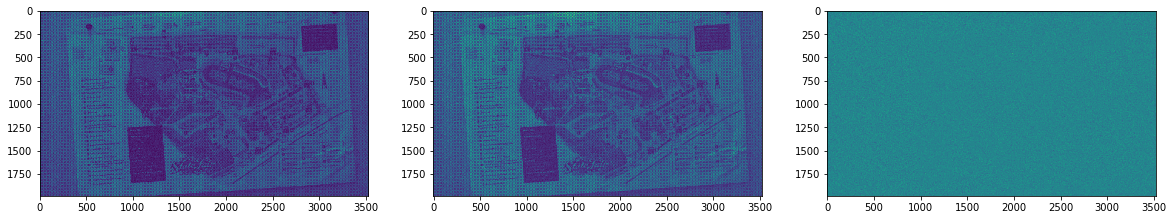

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref[32:-32, 32:-32])
ax[1].imshow(alignedImg[32:-32, 32:-32]) # frame 1
ax[2].imshow(ref[32:-32, 32:-32] - alignedImg[32:-32, 32:-32])
plt.show()

total error: 7003992


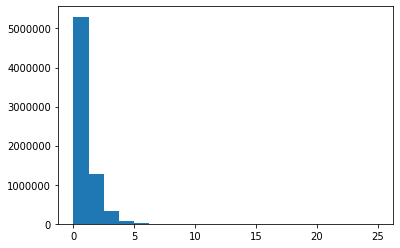

In [15]:
print("total error:", np.sum(np.abs(ref[32:-32, 32:-32] - alignedImg[32:-32, 32:-32])))
plt.hist(np.abs(ref[32:-32, 32:-32] - alignedImg[32:-32, 32:-32]).flatten(), 20)
plt.show()

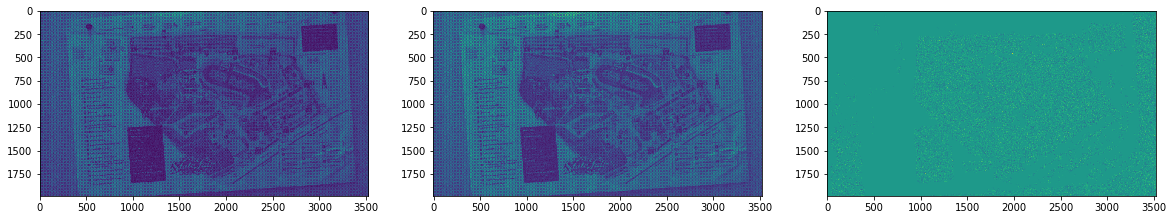

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref[32:-32, 32:-32])  # frame 0
ax[1].imshow(merged_frame[32:-32, 32:-32]) # frame 1
ax[2].imshow((ref - merged_frame)[32:-32, 32:-32])
plt.show()

total error: 3068664.3515786673


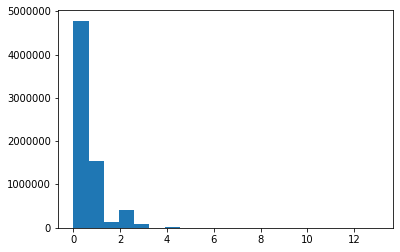

In [17]:
print("total error:", np.sum(np.abs(ref[32:-32, 32:-32] - merged_frame[32:-32, 32:-32])))
plt.hist(np.abs(ref[32:-32, 32:-32] - merged_frame[32:-32, 32:-32]).flatten(), 20)
plt.show()